In [5]:
import re
import matplotlib.pyplot as plt
from collections import *

###################################################
def filter(text):
    text = text.lower()
    text = text.replace('ё', 'е')
    text = re.sub(r'[^а-я]', '', text)
    return text

def encrypt(plain, k):
    ct = []
    r = len(k)
    for i, ch in enumerate(plain):
        x = bt.index(ch)
        y = bt.index(k[i % r])
        ct.append(bt[(x + y) % 32])
    return ''.join(ct)

def IC(text):
    n = len(text)
    freq = Counter(text)
    result = 0

    for count in freq.values():
        result += count * (count - 1)
    return result / (n * (n - 1))
###################################################


bt = "абвгдежзийклмнопрстуфхцчшщъыьэюя"
keys = ["пл", "ями", "млвц", "артфк","лвафолрипждф", "лдожйцкождзхлфв", "иобямжощцплмдзаркд"]
with open('text.txt', 'r', encoding='utf-8') as f:
    plain = filter(f.read())
    

enc = {}
for k in keys:
    ct = encrypt(plain, k)
    r = len(k)
    filename = f'encrypted_{r}.txt'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(ct)
    enc[k] = ct


result = {}
result['pt'] = IC(plain)
for k, ct in enc.items():
    result[k] = IC(ct)

for k, с in result.items():
    print(f'{k}: {с:.6f}')


pt: 0.052780
пл: 0.042642
ями: 0.037831
млвц: 0.034998
артфк: 0.035366
лвафолрипждф: 0.033671
лдожйцкождзхлфв: 0.033301
иобямжощцплмдзаркд: 0.032121


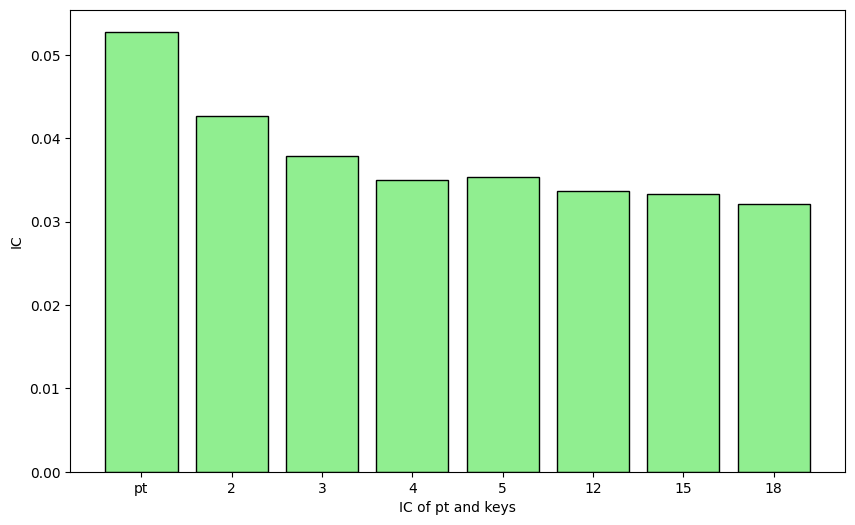

In [6]:
plt.figure(figsize=(10, 6))
x = ['pt' if k == 'pt' else str(len(k)) for k in result.keys()]
plt.bar(x, result.values(), color="lightgreen", edgecolor="black")
plt.xlabel("IC of pt and keys")
plt.ylabel("IC")
plt.show()

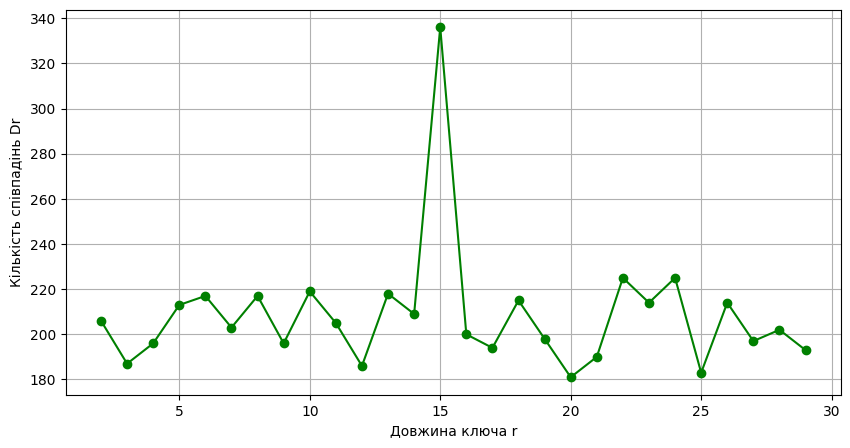

In [7]:
freq = {
    'о': 0.11473, 'е': 0.08664, 'а': 0.07577, 'н': 0.06736, 'и': 0.06313,
    'т': 0.06207, 'с': 0.05703, 'л': 0.04914, 'в': 0.04268, 'р': 0.04241,
    'м': 0.03598, 'к': 0.03403, 'д': 0.03123, 'у': 0.02828, 'п': 0.02643,
    'я': 0.02158, 'ь': 0.01910, 'ы': 0.01904, 'г': 0.01751, 'з': 0.01656,
    'б': 0.01642, 'ч': 0.01558, 'й': 0.01179, 'ж': 0.01019, 'х': 0.00909,
    'ш': 0.00823, 'ю': 0.00564, 'э': 0.00457, 'ц': 0.00316, 'щ': 0.00305,
    'ф': 0.00158, 'ъ': 0.00037
}

#######################################################################
def decrypt(ct, k):
    pt = []
    r = len(k)
    for i, ch in enumerate(ct):
        y = bt.index(ch)
        b = bt.index(k[i % r])
        pt.append(bt[(y - b) % 32])
    return ''.join(pt)


def DR(ct, r):
    n = len(ct)
    count = 0
    for i in range(n - r):
        if ct[i] == ct[i + r]:
            count += 1
    return count


def key_find(ct, r):
    key = ''    
    for i in range(r):
        best_cor = 0
        best_shift = 0
        
        block = ct[i::r]         
        block_count = Counter(block)
        n = len(block)  
        
        for shift in range(32):
            cur_cor = 0
            for chr, count in block_count.items():
                shifted_idx = (bt.index(chr) - shift) % 32
                shifted_chr = bt[shifted_idx]
                cur_cor += (count / n) * freq.get(shifted_chr, 0)
            
            if cur_cor > best_cor:
                best_shift = shift
                best_cor = cur_cor
                
        
        key += bt[best_shift] 
    return key
#######################################################################



with open('var10.txt', 'r', encoding='utf-8') as f:
    ct = filter(f.read())

Drs = []
for r in range(2, 30):
    Dr = DR(ct, r)
    Drs.append(Dr)


plt.figure(figsize=(10, 5))
plt.plot(range(2, 30), Drs, marker='o', color='green')
plt.xlabel('Довжина ключа r')
plt.ylabel('Кількість співпадінь Dr')
plt.grid()
plt.show()

In [8]:
r = 15

key = key_find(ct, r)
print(f'Key: {key}')

decrypted = decrypt(ct, key)
print(f'Розшифрований текст: {decrypted}')

with open('decrypted.txt', 'w', encoding='utf-8') as f:
    f.write(decrypted)

Key: крадущийсявтени
Розшифрований текст: тихотактихочтослышнокакмотылькицепляютсяхрупкимикрылышкамизаночнуюпрохладупораужеотправлятьсяпосвоимделамстражадавнопрошланоясегоднячтотослишкомосторожничаюнекоенеобъяснимоечувствозаставляетменязадержатьсявозлестенызданияпогруженноговтеньтеньмояподругамоялюбовницамоянапарницаяпрячусьвтенияживувнейтолькоонавсегдаготовапринятьменяспастиотстрелзлобносверкающихвлуннойночиклинковилиоткровожадныхзолотыхглаздемоновтенькакговоритдобрыйжрецсаготабратфоркогдахватитлишкувовремянашихредкихвстречтеньявляетсясестройтьмыаоттьмынедалекоидоненазываемогочушьненазываемыйитьмаабсолютноразныевещиэтовсеравночтосравниватьограивеликанатеньэтожизньтеньэтосвободатеньэтоденьгитеньэтовластьтеньэторепутацияужгарреттеньзнаетобэтомнепонаслышкетеньпоявляетсятолькотогдакогдасуществуетхотябыкрупицасветатакчтосравниватьеестьмойпоменьшеймереглупономоемустаромуучителюяестественноэтонеговорюяйцакурицунеучатнаузкойночнойулочкескаменнымидомамизаставшимитихиевременанераздавалосьнизвук